In [58]:
import pandas as pd
import numpy as np

In [43]:
#importing data and store into dataframe

path="//Users//kbruno635//Downloads//SampleSuperstore.csv"
df=pd.read_csv(path)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
df.shape

(9994, 13)

In [17]:

df1=df[['Ship Mode']].value_counts().to_frame()
df1

,0
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


In [41]:
df2=df[['State']].value_counts().to_frame()
#df2.set_index('Segment', 'Count')
df2.shape

(49, 1)

In [44]:
df_test1=df[['State', 'City', 'Category', 'Sub-Category','Sales', 'Profit' ]]

In [47]:
df_test1.groupby(['State', 'City', 'Category', 'Sub-Category'], inplace=True)

In [52]:
df_test1.sort_values(by= ['State', 'City', 'Category', 'Sub-Category'], inplace=True)

<ipython-input-52-b81654aa2eb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.sort_values(by= ['State', 'City', 'Category', 'Sub-Category'], inplace=True)


In [56]:
df_test1.head()

,State,City,Category,Sub-Category,Sales,Profit,percentage_profit
2013,Alabama,Auburn,Furniture,Chairs,350.98,84.2352,24.0
3447,Alabama,Auburn,Office Supplies,Art,3.76,1.0904,29.0
6923,Alabama,Auburn,Office Supplies,Envelopes,7.38,3.3948,46.0
6922,Alabama,Auburn,Office Supplies,Labels,491.55,240.8595,49.0
2014,Alabama,Auburn,Office Supplies,Paper,13.08,6.0168,46.0


In [55]:
df_test1['percentage_profit']=(df_test1['Profit']/df_test1['Sales'])*100

<ipython-input-55-39133bae0cf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['percentage_profit']=(df_test1['Profit']/df_test1['Sales'])*100


In [62]:
df_test1.sort_values(by=['percentage_profit'])

,State,City,Category,Sub-Category,Sales,Profit,percentage_profit
261,Texas,Pasadena,Office Supplies,Appliances,1.624,-4.466,-275.0
9164,Illinois,Chicago,Office Supplies,Appliances,143.128,-393.602,-275.0
8766,Texas,Fort Worth,Office Supplies,Appliances,24.588,-67.617,-275.0
676,Texas,Tyler,Office Supplies,Appliances,2.688,-7.392,-275.0
8246,Illinois,Aurora,Office Supplies,Appliances,70.970,-191.619,-270.0
...,...,...,...,...,...,...,...
8530,Michigan,Detroit,Office Supplies,Paper,33.360,16.680,50.0
6338,New York,New York City,Technology,Phones,87.800,43.900,50.0
61,New York,Troy,Office Supplies,Art,1.680,0.840,50.0
2291,Georgia,Columbus,Furniture,Furnishings,595.380,297.690,50.0


In [69]:
#places where there is a loss

df_loss=df_test1[df_test1['Profit']<0]
df_loss.head(10)

,State,City,Category,Sub-Category,Sales,Profit,percentage_profit
9195,Arizona,Avondale,Technology,Accessories,102.240,-16.6140,-16.250000
9040,Arizona,Chandler,Furniture,Tables,73.915,-45.8273,-62.000000
6380,Arizona,Chandler,Office Supplies,Fasteners,49.792,-11.8256,-23.750000
3882,Arizona,Gilbert,Furniture,Furnishings,364.704,-36.4704,-10.000000
6659,Arizona,Gilbert,Furniture,Tables,386.910,-185.7168,-48.000000
3881,Arizona,Gilbert,Office Supplies,Storage,82.368,-19.5624,-23.750000
6656,Arizona,Gilbert,Office Supplies,Storage,51.168,-6.3960,-12.500000
1465,Arizona,Glendale,Furniture,Furnishings,121.376,-3.0344,-2.500000
2952,Arizona,Glendale,Furniture,Furnishings,113.568,-5.6784,-5.000000
1704,Arizona,Glendale,Office Supplies,Binders,9.702,-7.1148,-73.333333


In [70]:
df_loss.shape

(1871, 7)

In [75]:
#loss by category of product
df_loss.groupby(['Category']).sum()

,Sales,Profit,percentage_profit
Category,,,
Furniture,257885.5868,-60936.1090,-23286.024743
Office Supplies,91608.6750,-56615.2585,-86877.083333
Technology,119212.8930,-38579.9182,-6701.678571


In [76]:
#loss by category and subcategory of product
df_loss.groupby(['Category', 'Sub-Category']).sum()

Sales      Profit  percentage_profit
Category        Sub-Category                                            
Furniture       Bookcases      48072.7408 -12152.2060       -4467.290616
                Chairs         91988.4560  -9880.8413       -2743.115079
                Furnishings    12845.8440  -6490.9134       -9763.750000
                Tables        104978.5460 -32412.1483       -6311.869048
Office Supplies Appliances      3382.5340  -8629.6412      -16975.000000
                Binders        36140.6130 -38510.4964      -66088.333333
                Fasteners        149.2800    -33.1952        -261.250000
                Storage        37869.0720  -6426.3038       -2856.250000
                Supplies       14067.1760  -3015.6219        -696.250000
Technology      Accessories    10958.8000   -930.6265        -825.000000
                Machines       72456.2530 -30118.6682       -2802.095238
                Phones         35797.8400  -7530.6235       -3074.583333

In [77]:
df_loss['Sub-Category'].value_counts()

Binders        613
Chairs         235
Tables         203
Furnishings    167
Storage        161
Phones         136
Bookcases      109
Accessories     91
Appliances      67
Machines        44
Supplies        33
Fasteners       12
Name: Sub-Category, dtype: int64

In [78]:
#sorted list of cities with loss in ascending order
df_loss.groupby(by='City').sum().sort_values('Profit',ascending=True).head(10)

,Sales,Profit,percentage_profit
City,,,
Philadelphia,70460.5510,-19590.7411,-10610.595238
Houston,37640.7304,-14785.3668,-18030.938375
Chicago,19910.0120,-11120.6271,-15693.428571
San Antonio,17395.1450,-7831.0254,-2936.845238
Lancaster,7699.2420,-7632.4946,-991.845238
Burlington,12044.8740,-5999.3318,-196.333333
Dallas,9994.0562,-4208.5218,-6745.525210
Jacksonville,31146.2710,-4059.9857,-1727.825758
New York City,19533.8020,-3966.0226,-878.472222


In [79]:
df_loss=df_loss.drop('percentage_profit', axis=1)


In [83]:
#state where sale is low
df.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

In [92]:
df[['Category', 'Sub-Category', 'Sales', 'Quantity', 'Profit']].sort_values(['Category', 'Sub-Category'],ascending=True).groupby('Sub-Category').sum()

,Sales,Quantity,Profit
Sub-Category,,,
Accessories,167380.3180,2976,41936.6357
Appliances,107532.1610,1729,18138.0054
Art,27118.7920,3000,6527.7870
Binders,203412.7330,5974,30221.7633
Bookcases,114879.9963,868,-3472.5560
Chairs,328449.1030,2356,26590.1663
Copiers,149528.0300,234,55617.8249
Envelopes,16476.4020,906,6964.1767
Fasteners,3024.2800,914,949.5182


In [93]:
import matplotlib.pyplot as plt

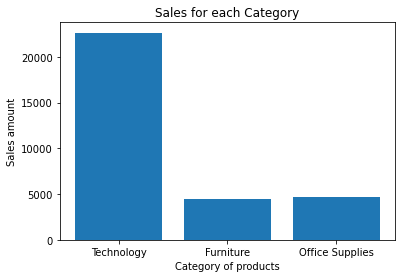

In [95]:
plt.bar(df_loss['Category'], df_loss['Sales'])
plt.title('Sales for each Category')
plt.xlabel('Category of products')
plt.ylabel('Sales amount')
plt.show()

As the sales in Furniture and Office Supplies is low, care should be taken to enhance the sale in these sectors.

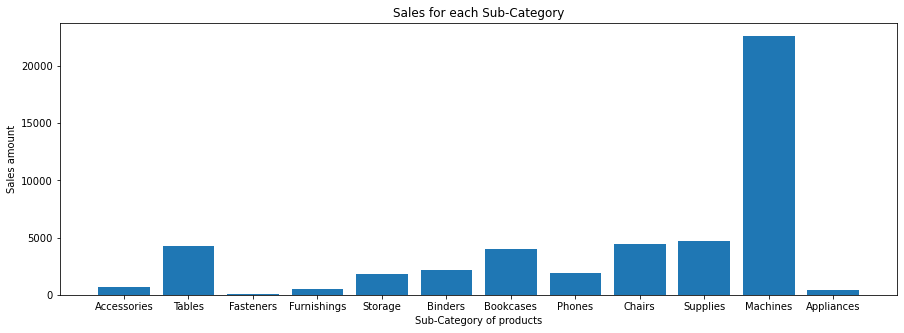

In [98]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(df_loss['Sub-Category'], df_loss['Sales'])
plt.title('Sales for each Sub-Category')
plt.xlabel('Sub-Category of products')
plt.ylabel('Sales amount')
plt.show()

Sales in Fasteners, Appliances, Accesories and Furnishing are very low. 

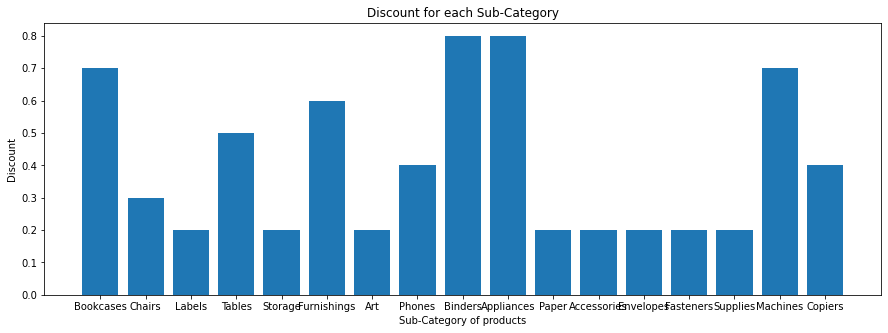

In [101]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(df['Sub-Category'], df['Discount'])
plt.title('Discount for each Sub-Category')
plt.xlabel('Sub-Category of products')
plt.ylabel('Discount')
plt.show()

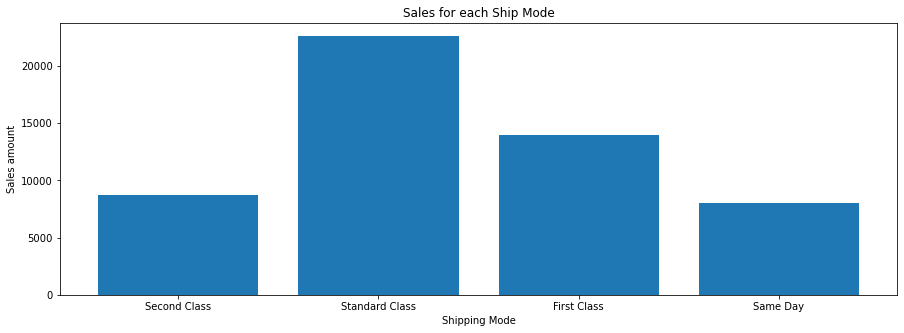

In [118]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(df['Ship Mode'], df['Sales'])
plt.title('Sales for each Ship Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Sales amount')
plt.show()

People have preffered Standard Class and First Class shipping more than Secondary and Same class shippping method.

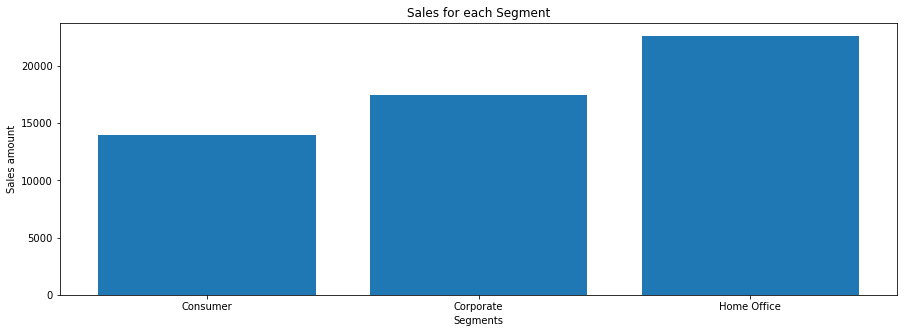

In [120]:
plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(df['Segment'], df['Sales'])
plt.title('Sales for each Segment')
plt.xlabel('Segments')
plt.ylabel('Sales amount')
plt.show()


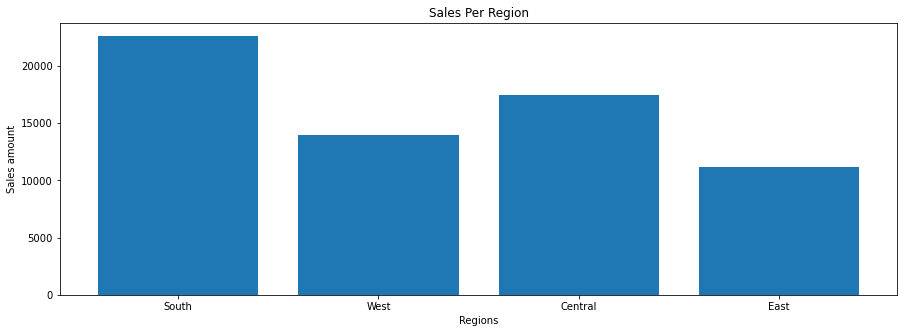

In [109]:

plt.rcParams["figure.figsize"] = (15, 5)
plt.bar(df['Region'], df['Sales'])
plt.title('Sales Per Region')
plt.xlabel('Regions')
plt.ylabel('Sales amount')
plt.show()


Sales in west and east are low, respective stretegy should be taken for improvement in sale.

<AxesSubplot:xlabel='Region', ylabel='Sales'>

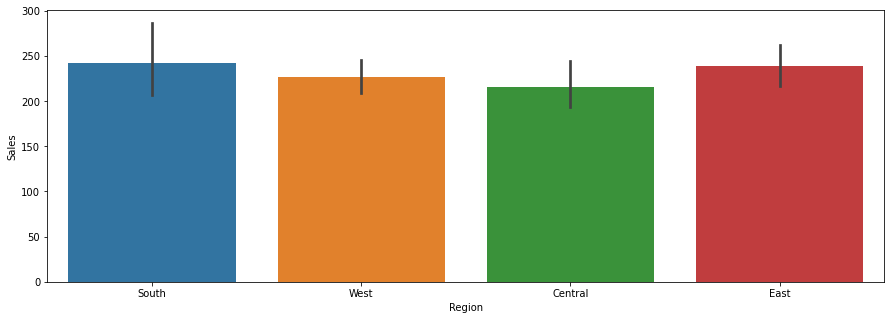

In [115]:
plt.rcParams["figure.figsize"] = (15, 5)
sns.barplot(x=df.Region, y=df.Sales, data=df)

In [117]:
'''df.plot(kind='scatter', x='Discount', y= 'Sales', figsize=(10, 6), color='black')
plt.title('Sales for different Discount Value')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()'''

"df.plot(kind='scatter', x='Discount', y= 'Sales', figsize=(10, 6), color='black')\nplt.title('Sales for different Discount Value')\nplt.xlabel('Discount')\nplt.ylabel('Sales')\nplt.show()"

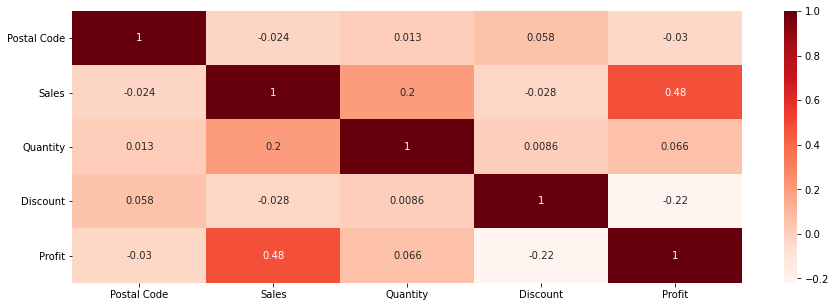

In [107]:
import seaborn as sns
df.corr()
sns.heatmap(df.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

From the above heatmap it can be seen a negative corelation between discount and profit hence it should be taken care of. 

Conclusion: 

1. 